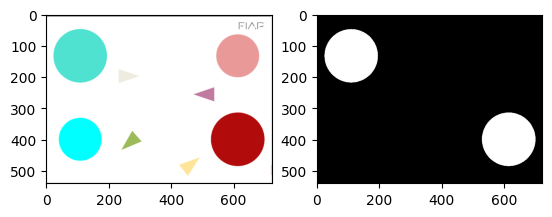

In [44]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('circulo.PNG')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)



# Definição dos valores minimo e max da mascara
# o magenta tem h=300 mais ou menos ou 150 para a OpenCV
image_lower_hsv = np.array([0, 150, 0])  
image_upper_hsv = np.array([30, 255, 255])


mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)


blue = img_hsv.copy()

image_lower2_hsv = np.array([80, 160, 160])  
image_upper2_hsv = np.array([87, 180, 255])

mask_hsv2 = cv2.inRange(blue, image_lower2_hsv, image_upper2_hsv)

mask_soma = cv2.bitwise_or(mask_hsv,mask_hsv2)


plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(mask_soma, cmap="Greys_r", vmin=0, vmax=255)
plt.show()


centro de massa na possição:  612 399
centro de massa na possição:  108 133
O ângulo entre os pontos é: 27.82 graus


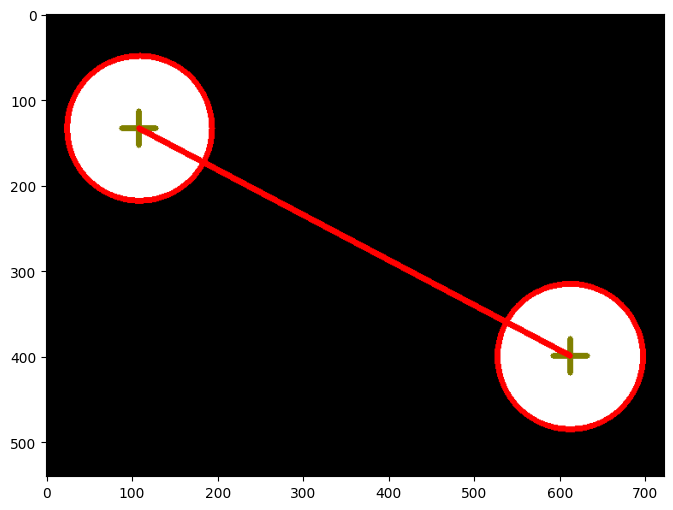

In [45]:

import math

contornos, _ = cv2.findContours(mask_soma, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 


mask_rgb = cv2.cvtColor(mask_soma, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"

cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);

plt.figure(figsize=(8,6))
plt.imshow(contornos_img);

listaVazia=[]

for x in range(len(contornos)):
    cnt = contornos[x]
    M = cv2.moments(cnt)
    # print( M )
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    listaVazia.append((cx,cy))
    print("centro de massa na possição: ",cx, cy)
    size = 20
    color = (128,128,0)
    cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)   
    cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)
    font = cv2.FONT_HERSHEY_SIMPLEX
    text = cy , cx
    origem = (0,50)
    # cv2.putText(contornos_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)


cv2.line(contornos_img, listaVazia[0], listaVazia[1], (255,0,0), 5)

plt.imshow(contornos_img)


dx = 612 - 108
dy = 399 - 133

angle = math.atan2(dy, dx)

# Conversão do ângulo para graus
angle_degrees = math.degrees(angle)

print("O ângulo entre os pontos é: {:.2f} graus".format(angle_degrees))

